In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import RFECV
import optuna
from optuna import create_study

import pickle

b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('Dataset/processed_dataset.csv')
df.head()

,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Obesity,Family history of cirrhosis/ hereditary,TCH,TG,LDL,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),MCH (picograms/cell),MCHC (grams/deciliter),Total Count,Polymorphs (%),Lymphocytes (%),Monocytes (%),Eosinophils (%),Basophils (%),Platelet Count (lakhs/mm),Total Bilirubin (mg/dl),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not),Systolic BP,Diastolic BP
0,65,0,1,15,2.0,2,0,0,1,1,1,180.0,160.0,105.0,35.0,11.9,33.0,3.5,69.0,30.0,33.0,11800.0,60.0,30.0,5.0,4.0,1.0,1.2,8.2,7.2,0.2,6.6,2.7,3.2,0.840000,136.0,57,44,0,0,140,100
1,62,0,1,30,1.0,0,0,0,0,0,0,194.0,166.0,106.0,35.0,8.8,30.0,4.1,120.0,41.0,36.0,6000.0,70.6,23.6,4.6,1.6,0.0,1.3,5.0,3.0,2.0,5.0,1.2,3.8,0.750000,121.0,154,158,0,0,98,60
2,35,0,2,5,3.0,2,1,1,0,0,0,194.0,166.0,106.0,35.0,11.5,42.0,4.3,90.0,29.0,31.0,7000.0,60.0,28.0,5.0,2.0,1.0,1.8,0.4,1.0,2.0,7.4,4.2,2.8,1.680000,90.0,110,70,1,1,130,80
3,72,0,2,4,3.0,1,0,0,0,0,0,194.0,166.0,106.0,35.0,12.3,42.0,5.2,84.0,29.0,36.0,7000.0,60.0,44.0,3.0,1.0,1.0,2.4,0.5,1.0,2.0,5.3,4.2,3.5,0.750000,110.0,110,70,1,1,120,80
4,39,1,1,28,1.0,1,0,0,1,0,0,194.0,166.0,106.0,35.0,9.9,38.0,3.9,102.0,28.0,30.0,8200.0,72.0,12.0,6.0,4.0,2.0,1.1,4.6,2.3,2.3,4.6,1.8,2.8,0.814046,196.0,126,98,0,0,102,60


In [4]:
df.shape

(1860, 42)

In [5]:
df1=df.copy()
df1.head()

,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Obesity,Family history of cirrhosis/ hereditary,TCH,TG,LDL,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),MCH (picograms/cell),MCHC (grams/deciliter),Total Count,Polymorphs (%),Lymphocytes (%),Monocytes (%),Eosinophils (%),Basophils (%),Platelet Count (lakhs/mm),Total Bilirubin (mg/dl),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not),Systolic BP,Diastolic BP
0,65,0,1,15,2.0,2,0,0,1,1,1,180.0,160.0,105.0,35.0,11.9,33.0,3.5,69.0,30.0,33.0,11800.0,60.0,30.0,5.0,4.0,1.0,1.2,8.2,7.2,0.2,6.6,2.7,3.2,0.840000,136.0,57,44,0,0,140,100
1,62,0,1,30,1.0,0,0,0,0,0,0,194.0,166.0,106.0,35.0,8.8,30.0,4.1,120.0,41.0,36.0,6000.0,70.6,23.6,4.6,1.6,0.0,1.3,5.0,3.0,2.0,5.0,1.2,3.8,0.750000,121.0,154,158,0,0,98,60
2,35,0,2,5,3.0,2,1,1,0,0,0,194.0,166.0,106.0,35.0,11.5,42.0,4.3,90.0,29.0,31.0,7000.0,60.0,28.0,5.0,2.0,1.0,1.8,0.4,1.0,2.0,7.4,4.2,2.8,1.680000,90.0,110,70,1,1,130,80
3,72,0,2,4,3.0,1,0,0,0,0,0,194.0,166.0,106.0,35.0,12.3,42.0,5.2,84.0,29.0,36.0,7000.0,60.0,44.0,3.0,1.0,1.0,2.4,0.5,1.0,2.0,5.3,4.2,3.5,0.750000,110.0,110,70,1,1,120,80
4,39,1,1,28,1.0,1,0,0,1,0,0,194.0,166.0,106.0,35.0,9.9,38.0,3.9,102.0,28.0,30.0,8200.0,72.0,12.0,6.0,4.0,2.0,1.1,4.6,2.3,2.3,4.6,1.8,2.8,0.814046,196.0,126,98,0,0,102,60


In [6]:
df["AST_ALT_Ratio"] = df["SGOT/AST (U/L)"] / df["SGPT/ALT (U/L)"]
df["Direct_Total_Bilirubin_Ratio"] = df["Direct (mg/dl)"] / df["Total Bilirubin (mg/dl)"]
df["TG_HDL_Ratio"] = df["TG"] / df["HDL"]
df["LDL_HDL_Ratio"] = df["LDL"] / df["HDL"]
df["RDW"] = df["MCV (femtoliters/cell)"] / df["MCH (picograms/cell)"]

df["Lifetime_Alcohol_Consumption"] = df["Duration of alcohol consumption(years)"] * df["Quantity of alcohol consumption (quarters/day)"]
df["Alcohol_Consumption_Intensity"] = df["Quantity of alcohol consumption (quarters/day)"] / df["Duration of alcohol consumption(years)"]

In [7]:
df["Liver_Stress_Score"] = ((df["AST_ALT_Ratio"] > 2) | (df["Total Bilirubin (mg/dl)"] > 2) | (df["Albumin (g/dl)"] < 3)).astype(int)
df["Metabolic_Syndrome_Indicator"] = ((df["TG_HDL_Ratio"] > 4) | (df["LDL_HDL_Ratio"] > 3.5) | (df["Obesity"] == 1)).astype(int)

In [8]:
df["Age_Alcohol_Interaction"] = df["Age"] * df["Duration of alcohol consumption(years)"]
df["FamilyHistory_Diabetes"] = df["Family history of cirrhosis/ hereditary"] * df["Diabetes Result"]
df["Obesity_LDL"] = df["Obesity"] * df["LDL"]
df["Obesity_TG"] = df["Obesity"] * df["TG"]

In [9]:
def categorize_age(age):
    if age < 40:
        return "Young"
    elif 40 <= age <= 60:
        return "Middle_Aged"
    else:
        return "Elderly"

In [10]:
df["Age_Category"] = df["Age"].apply(categorize_age)
df["Alcohol_Category"] = pd.cut(df["Quantity of alcohol consumption (quarters/day)"], bins=[0, 1, 2, 3, np.inf], labels=["Non-Drinker", "Light", "Moderate", "Heavy"])
df["BP_Category"] = pd.cut(df["Systolic BP"], bins=[0, 120, 140, np.inf], labels=["Normal", "Prehypertension", "Hypertension"])

In [11]:
df = pd.get_dummies(df, columns=["Age_Category", "Alcohol_Category", "BP_Category"], drop_first=True)

In [12]:
correlation_matrix = df.corr()
high_correlation = correlation_matrix["Predicted Value(Out Come-Patient suffering from liver cirrosis or not)"].abs().sort_values(ascending=False)
print(high_correlation.head(15)) 

Predicted Value(Out Come-Patient suffering from liver cirrosis or not)    1.000000
Liver_Stress_Score                                                        0.979774
USG Abdomen (diffuse liver or not)                                        0.979774
Total Bilirubin (mg/dl)                                                   0.888982
Alcohol_Consumption_Intensity                                             0.874731
RBC (million cells/microliter)                                            0.814467
Direct_Total_Bilirubin_Ratio                                              0.789095
Duration of alcohol consumption(years)                                    0.780853
Diabetes Result                                                           0.730334
Alcohol_Category_Moderate                                                 0.696064
Age_Alcohol_Interaction                                                   0.681638
AL.Phosphatase (U/L)                                                      0.649862
Obes

In [13]:
scaler = StandardScaler()
numeric_cols = ["AST_ALT_Ratio", "TG_HDL_Ratio", "LDL_HDL_Ratio", "RDW", "Lifetime_Alcohol_Consumption", "Alcohol_Consumption_Intensity"]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [14]:
df.drop([
    "SGOT/AST (U/L)", 
    "SGPT/ALT (U/L)", 
    "Total Bilirubin (mg/dl)", 
    "Direct (mg/dl)", 
    "TG", 
    "HDL",  
    "Duration of alcohol consumption(years)", 
    "Quantity of alcohol consumption (quarters/day)",  
    "AL.Phosphatase (U/L)", 
    "LDL", 
    "Age", 
    "Systolic BP", 
    "Diastolic BP",
    "Hepatitis B infection",  
    "Diabetes Result",   
    "Age_Alcohol_Interaction"
], axis=1, inplace=True)

In [15]:
df.shape

(1860, 46)

In [16]:
X = df.drop(columns=["Predicted Value(Out Come-Patient suffering from liver cirrosis or not)"])
y = df["Predicted Value(Out Come-Patient suffering from liver cirrosis or not)"]

In [17]:
df.to_csv("Dataset/feature_processed_dataset.csv", index=False)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naïve Bayes": GaussianNB(),
}

In [21]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }
    print(f"\n{name} Performance:\n", classification_report(y_test, y_pred))



Logistic Regression Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00       360

    accuracy                           1.00       744
   macro avg       1.00      1.00      1.00       744
weighted avg       1.00      1.00      1.00       744


Decision Tree Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00       360

    accuracy                           1.00       744
   macro avg       1.00      1.00      1.00       744
weighted avg       1.00      1.00      1.00       744


Random Forest Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00       360

    accuracy                           1.00       744
   macro avg       1.00      1.00  

b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:43:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



K-Nearest Neighbors Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00       360

    accuracy                           1.00       744
   macro avg       1.00      1.00      1.00       744
weighted avg       1.00      1.00      1.00       744


Naïve Bayes Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00       360

    accuracy                           1.00       744
   macro avg       1.00      1.00      1.00       744
weighted avg       1.00      1.00      1.00       744



In [22]:
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.sort_values(by="F1 Score", ascending=False))


Model Performance Comparison:
                     Accuracy  Precision  Recall  F1 Score
Logistic Regression       1.0        1.0     1.0       1.0
Decision Tree             1.0        1.0     1.0       1.0
Random Forest             1.0        1.0     1.0       1.0
Gradient Boosting         1.0        1.0     1.0       1.0
XGBoost                   1.0        1.0     1.0       1.0
SVM                       1.0        1.0     1.0       1.0
K-Nearest Neighbors       1.0        1.0     1.0       1.0
Naïve Bayes               1.0        1.0     1.0       1.0


### Logistic Regression

In [23]:
log_reg = LogisticRegression(solver='liblinear', random_state=42)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'class_weight': [None, 'balanced']}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_logreg = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0


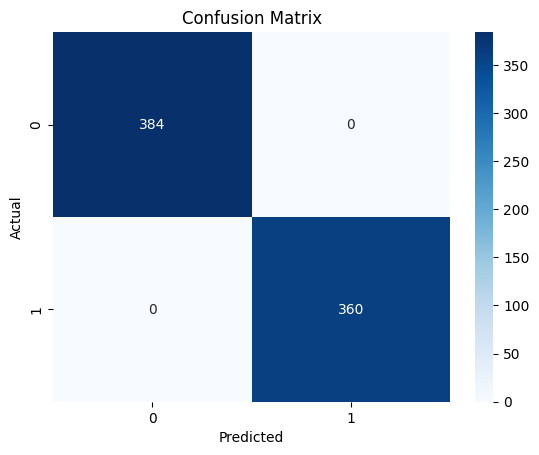

In [25]:
y_pred = best_logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, best_logreg.predict_proba(X_test)[:, 1]))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Decision Tree

In [26]:
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    "max_depth": [3, 5, 10, None],  
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4],  
    "criterion": ["gini", "entropy"]  
}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0


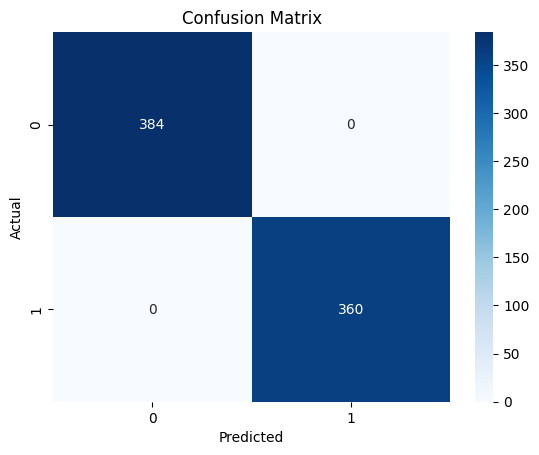

In [27]:
y_pred = best_dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, best_dt.predict_proba(X_test)[:, 1]))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

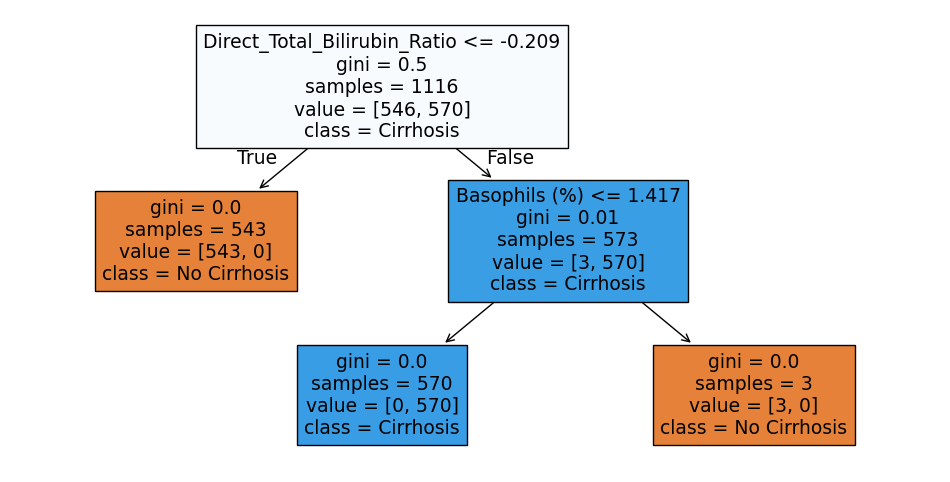

In [28]:
plt.figure(figsize=(12, 6))
plot_tree(best_dt, feature_names=X.columns, class_names=["No Cirrhosis", "Cirrhosis"], filled=True, max_depth=3)
plt.show()

### Random Forest

In [29]:
param_grid = {
    'n_estimators': [100, 300, 500, 800],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'max_features': ['sqrt', 'log2'],  # Features per split
    'bootstrap': [True, False]  # Bootstrap sampling
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_grid, 
    n_iter=50, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=42
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Tuned Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00       360

    accuracy                           1.00       744
   macro avg       1.00      1.00      1.00       744
weighted avg       1.00      1.00      1.00       744

ROC-AUC Score: 1.0


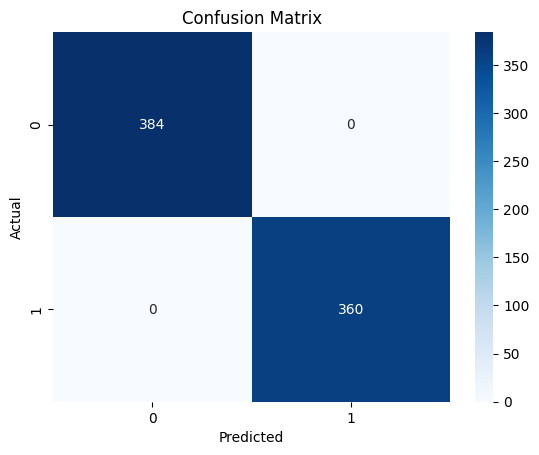

In [30]:
y_pred_rf = best_rf.predict(X_test)

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### XGBoost

In [31]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
selector = RFECV(model, step=1, cv=5, scoring="accuracy")
selector.fit(X_train, y_train)

b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:48:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:48:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:48:01] WARN

RFECV(cv=5,
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric='logloss',
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...),
      scoring='accuracy')

In [32]:
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print(f"Selected {X_train_selected.shape[1]} best features from {X_train.shape[1]}")

Selected 3 best features from 45


In [33]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=100),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 10),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.1, 10),
    }
    
    model = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric="logloss")
    score = cross_val_score(model, X_train_selected, y_train, cv=5, scoring="accuracy").mean()
    
    return score

In [34]:
study = create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2025-03-13 14:48:06,594] A new study created in memory with name: no-name-a4880da1-e463-43e2-bbad-c598d8096465
b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:48:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:48:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_U

In [35]:
best_params = study.best_params
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.18384994875052524, 'subsample': 0.952365448009242, 'colsample_bytree': 0.9884597494968731, 'gamma': 0.09175800996077677, 'min_child_weight': 1, 'reg_lambda': 3.869972469613167, 'reg_alpha': 1.2344068264550456}


In [36]:
best_xgb = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric="logloss")
best_xgb.fit(X_train_selected, y_train)

b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:48:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9884597494968731, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None,
              gamma=0.09175800996077677, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.18384994875052524,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
y_pred = best_xgb.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [38]:
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000
F1 Score: 1.0000
AUC-ROC Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00       360

    accuracy                           1.00       744
   macro avg       1.00      1.00      1.00       744
weighted avg       1.00      1.00      1.00       744



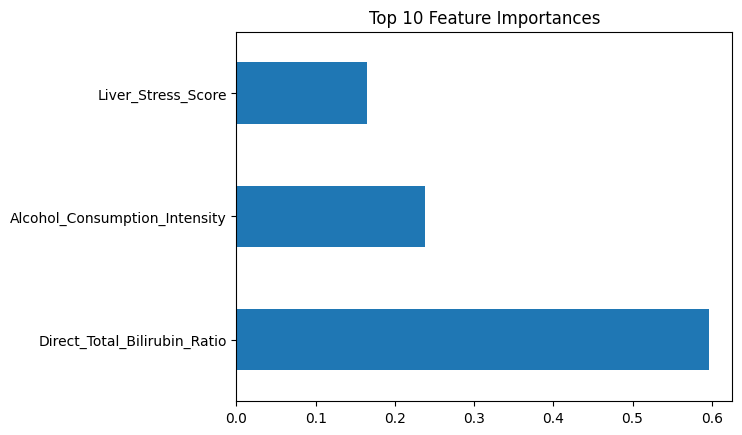

In [39]:
feat_importances = pd.Series(best_xgb.feature_importances_, index=X.columns[selector.support_])
feat_importances.nlargest(10).plot(kind='barh', title="Top 10 Feature Importances")
plt.show()

### SVC

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
svc = SVC(probability=True, random_state=42)

In [42]:
param_grid = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto", 0.01, 0.1, 1],
}

In [43]:
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring="roc_auc", n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='roc_auc', verbose=2)

In [44]:
best_svc = grid_search.best_estimator_

In [45]:
y_pred = best_svc.predict(X_test_scaled)
y_prob = best_svc.predict_proba(X_test_scaled)[:, 1]

In [46]:
print("Best SVC Parameters:", grid_search.best_params_)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y_test, y_prob))

Best SVC Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00       360

    accuracy                           1.00       744
   macro avg       1.00      1.00      1.00       744
weighted avg       1.00      1.00      1.00       744


AUC-ROC Score: 1.0


### KNN

In [47]:
param_grid = {"n_neighbors": np.arange(1, 50, 2), "weights": ["uniform", "distance"]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [48]:
best_knn = grid_search.best_estimator_
print("Best K:", grid_search.best_params_["n_neighbors"])
print("Best Weights:", grid_search.best_params_["weights"])

Best K: 1
Best Weights: uniform


In [49]:
knn_model= best_knn.fit(X_train, y_train)

In [50]:
y_pred = knn_model.predict(X_test)

In [51]:
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Accuracy: 1.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00       360

    accuracy                           1.00       744
   macro avg       1.00      1.00      1.00       744
weighted avg       1.00      1.00      1.00       744


 Confusion Matrix:
 [[384   0]
 [  0 360]]


### Naive Bayes

In [52]:
gnb= GaussianNB()

In [53]:
gnb.fit(X_train, y_train)

GaussianNB()

In [54]:
y_pred = gnb.predict(X_test)

In [55]:
scores = cross_val_score(gnb, X_train, y_train, cv=5, scoring="roc_auc")


In [56]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, gnb.predict_proba(X_test)[:, 1]))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0


## Comparison


In [57]:
def get_metrics(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = None

    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc
    }

In [58]:
models["Logistic Regression"].fit(X_train, y_train)
models["Decision Tree"].fit(X_train, y_train)
models["Random Forest"].fit(X_train, y_train)
models["XGBoost"].fit(X_train, y_train)
models["SVM"].fit(X_train, y_train)
models["K-Nearest Neighbors"].fit(X_train, y_train)
models["Naïve Bayes"].fit(X_train, y_train)

b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:48:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GaussianNB()

In [59]:
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf,
    "XGBoost": best_xgb,
    "SVM": best_svc,
    "KNN": best_knn,
    "Naïve Bayes": gnb
}

In [60]:
for name, model in models.items():
    model.fit(X_train, y_train)

b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:48:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [61]:
results = [get_metrics(model, X_test, y_test, name) for name, model in models.items()]
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

In [62]:
print(results_df)

                 Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
0  Logistic Regression       1.0        1.0     1.0       1.0      1.0
1        Decision Tree       1.0        1.0     1.0       1.0      1.0
2        Random Forest       1.0        1.0     1.0       1.0      1.0
3              XGBoost       1.0        1.0     1.0       1.0      1.0
4                  SVM       1.0        1.0     1.0       1.0      1.0
5                  KNN       1.0        1.0     1.0       1.0      1.0
6          Naïve Bayes       1.0        1.0     1.0       1.0      1.0


In [63]:
def cross_val_evaluate(model, X, y, model_name):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    acc = cross_val_score(model, X, y, cv=skf, scoring="accuracy").mean()
    precision = cross_val_score(model, X, y, cv=skf, scoring="precision").mean()
    recall = cross_val_score(model, X, y, cv=skf, scoring="recall").mean()
    f1 = cross_val_score(model, X, y, cv=skf, scoring="f1").mean()
    roc_auc = cross_val_score(model, X, y, cv=skf, scoring="roc_auc").mean()
    
    return {"Model": model_name, "Accuracy": acc, "Precision": precision, "Recall": recall, "F1 Score": f1, "ROC-AUC": roc_auc}

In [64]:
cv_log_reg = cross_val_evaluate(log_reg, X, y, "Logistic Regression")

In [65]:
cv_dt = cross_val_evaluate(dt, X, y, "Decision Tree")

In [66]:
cv_rf = cross_val_evaluate(best_rf, X, y, "Random Forest")

In [67]:
cv_xgb = cross_val_evaluate(best_xgb, X, y, "XGBoost")

b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:48:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:48:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
b:\Git hub\Revolutionizing_Liver_Care_-_Predicting_Liver_Cirrhosis_Using_Advanced_Machine_Learning_Techniques\.env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:48:50] WARN

In [68]:
cv_knn = cross_val_evaluate(best_knn, X, y, "KNN")

In [69]:
cv_gnb = cross_val_evaluate(gnb, X, y, "Naïve Bayes")

In [70]:
results = [cv_log_reg, cv_dt, cv_rf, cv_xgb, cv_knn, cv_gnb]

In [71]:
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print(results_df)

                 Model  Accuracy  Precision  Recall  F1 Score   ROC-AUC
1        Decision Tree  1.000000   1.000000     1.0  1.000000  1.000000
2        Random Forest  1.000000   1.000000     1.0  1.000000  1.000000
3              XGBoost  1.000000   1.000000     1.0  1.000000  1.000000
5          Naïve Bayes  1.000000   1.000000     1.0  1.000000  1.000000
4                  KNN  0.999462   0.998930     1.0  0.999464  0.999462
0  Logistic Regression  0.997849   0.995733     1.0  0.997858  0.998549


In [72]:
with open("model.pkl", "wb") as file:
    pickle.dump(best_logreg, file)